In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [10]:
import json

with open('part-1.jsonl') as f:
  json_list = list(f)
  
years = []
for line in json_list:
  obj = json.loads(line)
  years.append(mdates.num2date(mdates.datestr2num(obj['datePublished'])))
  

In [15]:
import random

num = 5001
text = ''
while num > 5000:
  text = json.loads(json_list[random.randint(0, len(json_list)-1)])
  num = len(''.join(text['fullText']))
print(text)

{'datePublished': '2001-04-01', 'docSubType': 'misc', 'docType': 'article', 'fullText': ['NEW FROM CHICAGO Lost Property The Woman Writer and English Literary History, 1380-1589 Jennifer Summit "This beautifully written book is one of the first to write across the English medieval/Renaissance divide; one of the first to situate female authorship within the history of material texts; and the first to argue that notions of \'the lost woman writer\' proved integral to the construc- tion of English literary tradition. Anyone interested in the history of women, of religion, and of literature from the fourteenth to eighteenth centuries will want to read this remembering book" David wallac University of Pennsylvania Paper $18.00 Now in paper Maurice, or The Fisher\'s Cot A Tale Mary Shelley Discovered in 1997 and written two years after Frankenstein, Maurice is the only children\'s story ever penned by Mary Shelley. "Tomalin\'s lively introduction offers a wonderful sketch of the Shelleys....

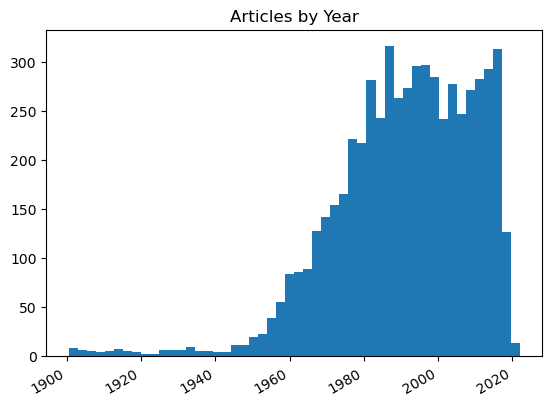

In [4]:
fig, ax = plt.subplots(1,1)
ax.hist(years, bins=50)
fig.autofmt_xdate()
plt.title('Articles by Year')
plt.show()

In [5]:
def article_length(item):
  return len(''.join(item['fullText']))

1316


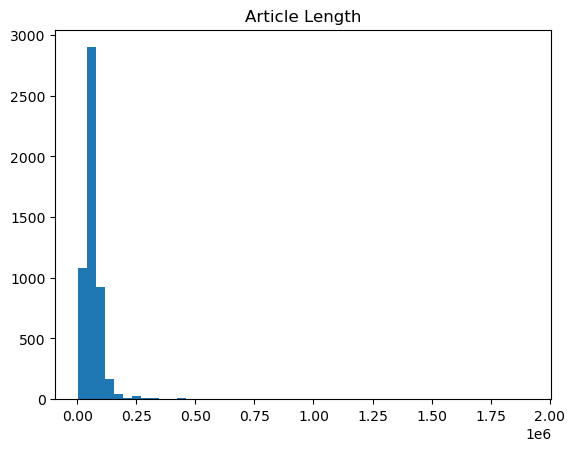

In [6]:
lens = []
for i in json_list:
  lens.append(article_length(json.loads(i)))
#   print(lens[-1])
  
print(min(lens))
  
fig, ax = plt.subplots(1,1)
ax.hist(lens, bins=50)
plt.title('Article Length')
plt.show()

In [8]:
def diachronic(json_list, years, time_span, func, average=True, display=True):
  if len(json_list) != len(years):
    raise Exception('Mismatched length of JSON and year lists.')
    
  hist_dict = {}
  lengths = {}
  for i in range(len(json_list)):
    time_bucket = years[i].year // time_span
    
    if time_bucket not in hist_dict:
      hist_dict[time_bucket] = 0
      lengths[time_bucket] = 0
    hist_dict[time_bucket] += func(json.loads(json_list[i]))
    lengths[time_bucket] += 1

  if average:
    hist_dict = {x: hist_dict[x]/lengths[x] for x in hist_dict}
    
  if display:
    fig, ax = plt.subplots(1,1)
    
    keys = [year * time_span for year in hist_dict.keys()]
    values = hist_dict.values()
    
    keys, values = zip(*sorted(zip(keys, values)))

    ax.plot(keys, values)
    fig.autofmt_xdate()
    plt.title(f'{'Average' if average else 'Total'} Article Length by Decade')
    plt.show()

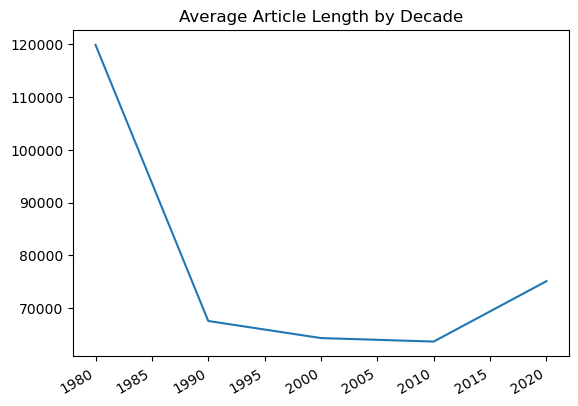

In [9]:
diachronic(json_list, years, 10, article_length)